In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sas

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
Bchurn = pd.read_csv('merged_trial_results.csv')

In [5]:
Bchurn.head(3)

,Unnamed: 0,user_id,date,source,device,payee,browser,sex,age,industry_code,group,trial
0,1,176,1/4/2017,Facebook,mobile,Non-Primary,Android (In-App),M,31.0,MFG,Test,0
1,2,976,1/5/2017,Email,mobile,Non-Primary,Android (In-App),M,41.0,MFG,Test,0
2,3,1292,1/9/2017,Facebook,mobile,Non-Primary,Android (In-App),M,34.0,GRT,Control,1


In [9]:
Bchurn.shape

(346929, 12)

In [7]:
Bchurn.columns

Index(['Unnamed: 0', 'user_id', 'date', 'source', 'device', 'payee', 'browser',
       'sex', 'age', 'industry_code', 'group', 'trial'],
      dtype='object')

In [10]:
Bchurn = Bchurn [['user_id', 'date', 'source', 'device', 'payee', 'browser', 'sex', 'age',
       'industry_code', 'trial', 'group']]

In [11]:
Bchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346929 entries, 0 to 346928
Data columns (total 11 columns):
user_id          346929 non-null int64
date             346929 non-null object
source           346929 non-null object
device           346929 non-null object
payee            346929 non-null object
browser          346929 non-null object
sex              346573 non-null object
age              346573 non-null float64
industry_code    346573 non-null object
trial            346929 non-null int64
group            346929 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 29.1+ MB


In [21]:
Bchurn['trial'].value_counts()

0    329713
1     17216
Name: trial, dtype: int64

In [22]:
Bchurn['trial'].value_counts(normalize=True)

0    0.950376
1    0.049624
Name: trial, dtype: float64

# Conversion rate analysis

In [13]:
# Filter Bchurn to show only control users data
Bchurn[Bchurn['group']=='Control'].head(3)

,user_id,date,source,device,payee,browser,sex,age,industry_code,trial,group
2,1292,1/9/2017,Facebook,mobile,Non-Primary,Android (In-App),M,34.0,GRT,1,Control
3,1821,1/8/2017,Facebook,mobile,Non-Primary,iOS (In-App),M,33.0,MFG,0,Control
4,1922,1/5/2017,LinkedIn,mobile,Non-Primary,Android (In-App),M,30.0,MFE,0,Control


In [14]:
# Filter Bchurn to show only test users data
Bchurn[Bchurn['group']=='Test'].head(3)

,user_id,date,source,device,payee,browser,sex,age,industry_code,trial,group
0,176,1/4/2017,Facebook,mobile,Non-Primary,Android (In-App),M,31.0,MFG,0,Test
1,976,1/5/2017,Email,mobile,Non-Primary,Android (In-App),M,41.0,MFG,0,Test
8,4396,1/7/2017,Facebook,mobile,Non-Primary,Android (In-App),F,49.0,LPK,0,Test


In [21]:
def conversion_rate_plots (segment_by, filtered_data):
    
    #initialize subplots for 2 columns
    fig, (ax1, ax2)= plt.subplots(ncols=2, sharey=False, figsize=(14,6))
    
    #on the left, plot the distribution
    sas.countplot(x=segment_by, data=filtered_data, ax=ax1)
    
    #on the right, plot the conversion rate
    sas.barplot(x=segment_by,y='trial', data=filtered_data, ax=ax2)
    
    #Set title
    plt.title('conversion rate by {}'.format(segment_by.capitalize()))
    plt.show

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


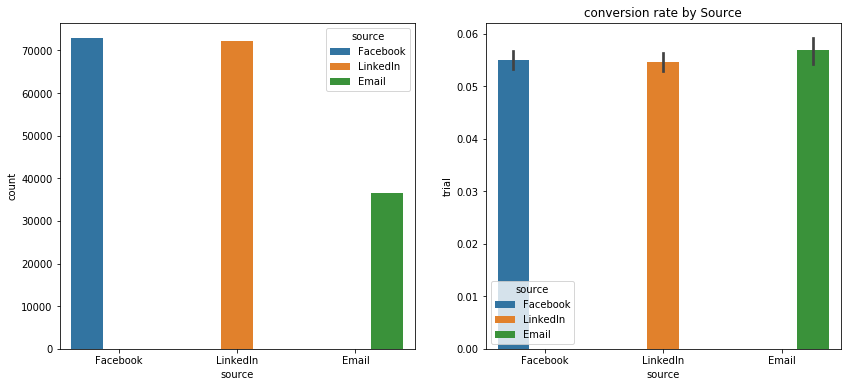

In [19]:
# Control users
conversion_rate_plots(segment_by='source', filtered_data=Bchurn[Bchurn['group']=='Control'])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


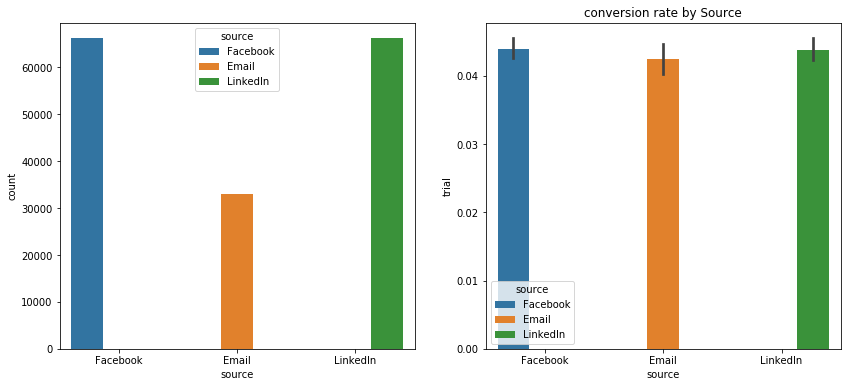

In [20]:
# Test users
conversion_rate_plots(segment_by='source', filtered_data=Bchurn[Bchurn['group']=='Test'])

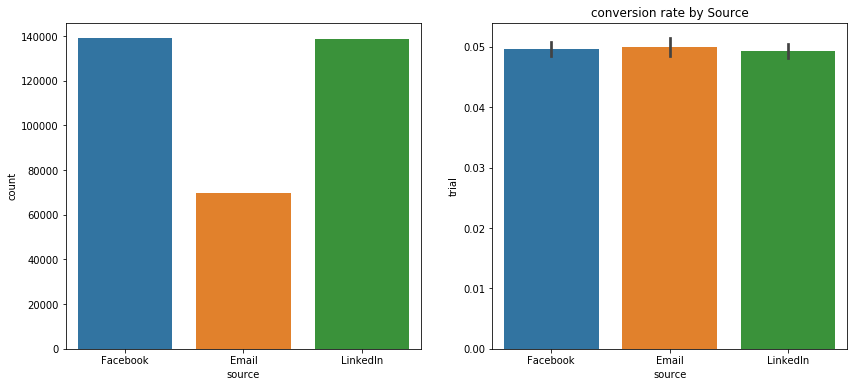

In [12]:
# All users
conversion_rate_plots(segment_by='source', filtered_data=Bchurn)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


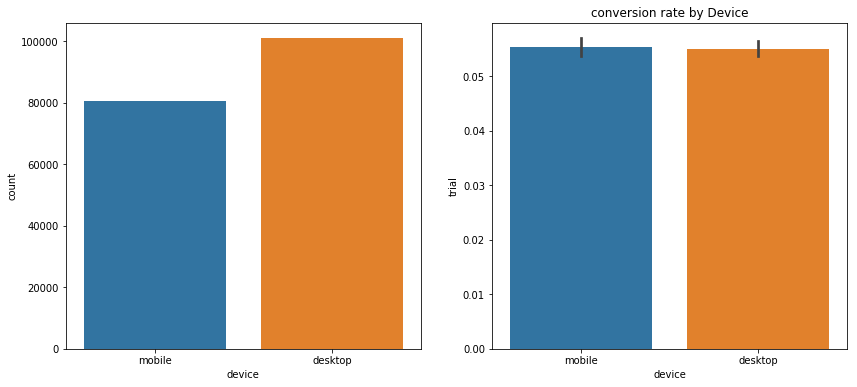

In [22]:
# Control users
conversion_rate_plots(segment_by='device',filtered_data=Bchurn[Bchurn['group']=='Control'])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


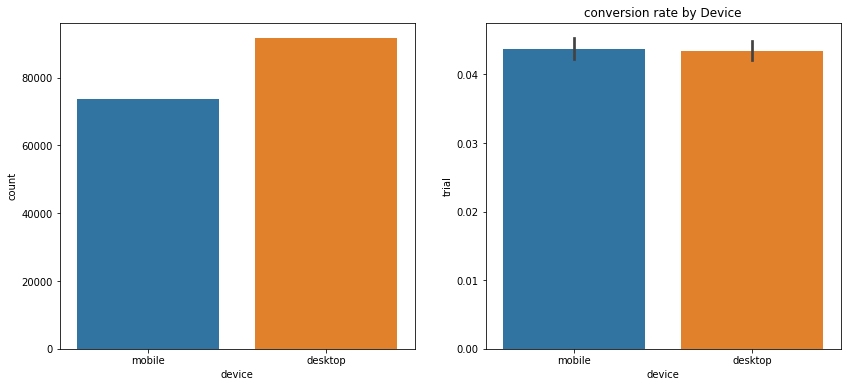

In [23]:
# Test users
conversion_rate_plots(segment_by='device',filtered_data=Bchurn[Bchurn['group']=='Test'])

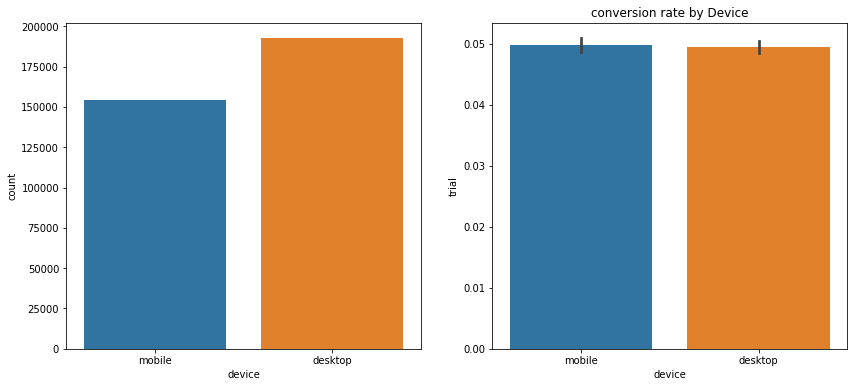

In [13]:
# All users
conversion_rate_plots(segment_by='device',filtered_data=Bchurn)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


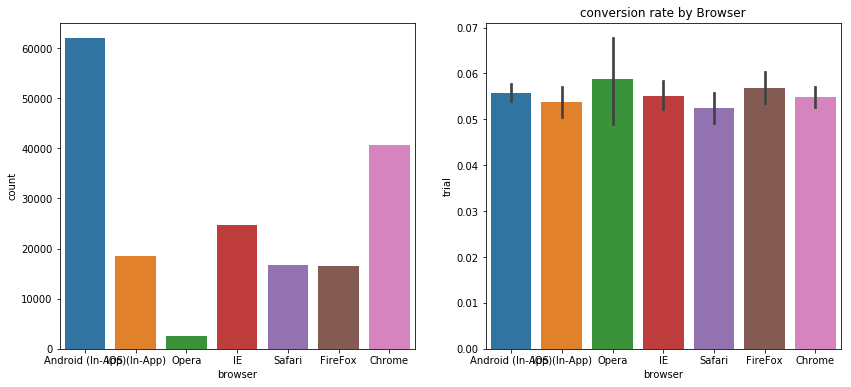

In [24]:
# Control users
conversion_rate_plots(segment_by='browser',filtered_data=Bchurn[Bchurn['group']=='Control'])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


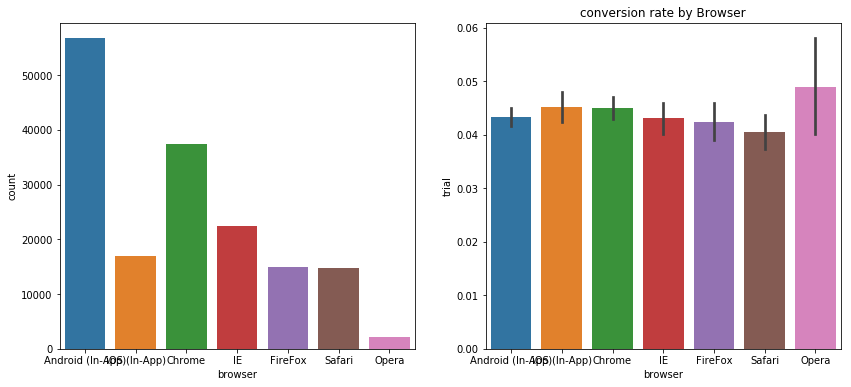

In [25]:
# Test users
conversion_rate_plots(segment_by='browser',filtered_data=Bchurn[Bchurn['group']=='Test'])

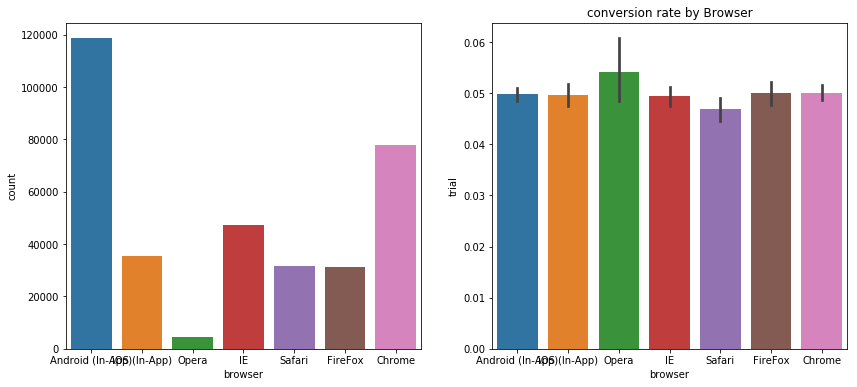

In [14]:
# All users
conversion_rate_plots(segment_by='browser')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


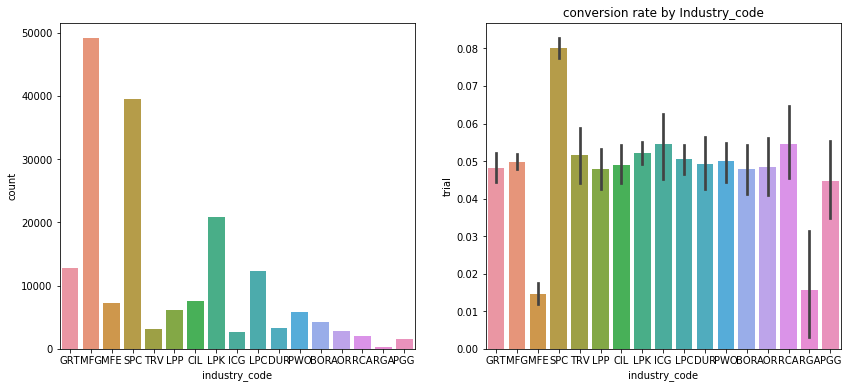

In [26]:
# Control users
conversion_rate_plots(segment_by='industry_code',filtered_data=Bchurn[Bchurn['group']=='Control'])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


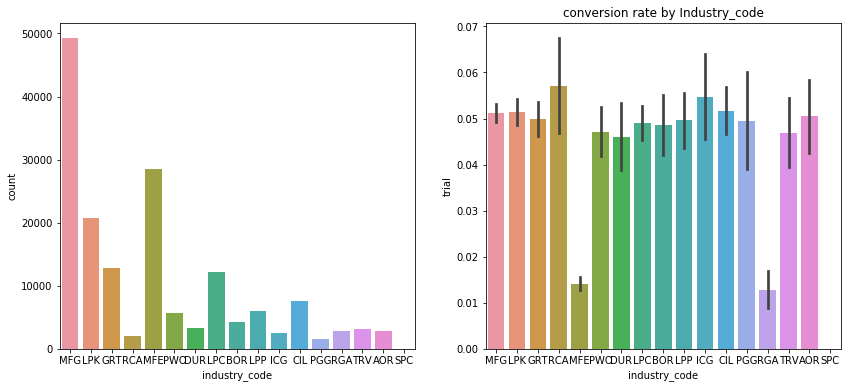

In [27]:
# Test users
conversion_rate_plots(segment_by='industry_code',filtered_data=Bchurn[Bchurn['group']=='Test'])

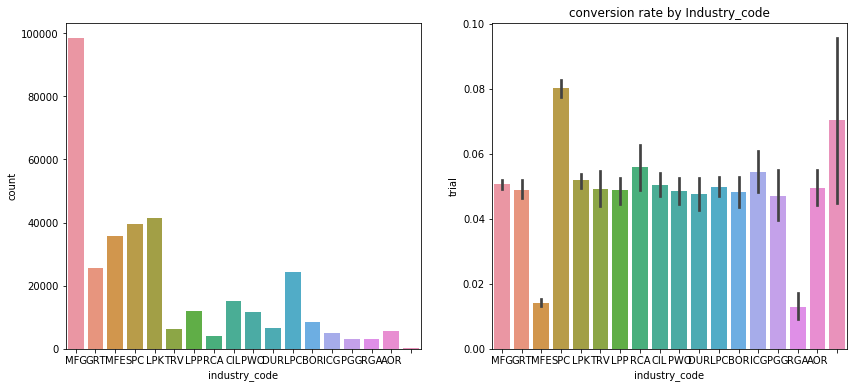

In [15]:
# All users
conversion_rate_plots(segment_by='industry_code')

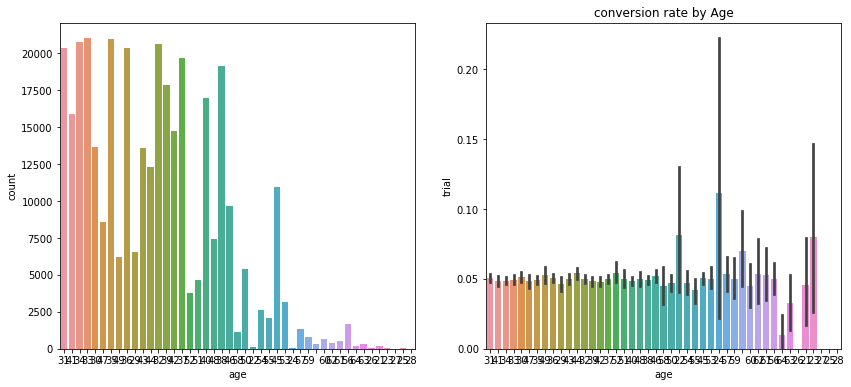

In [19]:
conversion_rate_plots(segment_by='age')